<a href="https://colab.research.google.com/github/YangHamin/ITS-study-IDF-/blob/main/ITSlecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#고속도로 15분통행량 data 분석 실습임. 

- data  분석 실습 순서 - 
0. 다운로드 받은 데이터셋 확인 
1. 데이터셋 업로드
2. 한글폰트 설치 
3. google drive 마운트 
----------------------------
4. 데이터 로드 
5. 데이터 가공 
6. 데이터 탐색 및 시각화 

In [2]:
# 1. 한글폰트 설치 후 런타임 시작 

In [26]:
# ! : colab jupyter natebook cell 에서 리눅스 셸(shell) 명령어 커맨드를 실행하기 위해 붙혀줌 
# sudo : supre user 권한으로 명령어를 실행 
# apt-get : linux package manager 명령어 
# install : 설치 
# -y : prompt 발생시 기본적으로 yes 처리 
# rm : 삭제 
# ~/ :사용자 홈 디렉토리 
!sudo apt-get install -y fonts-nanum # 나눔폰트 다운
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and di

In [1]:
# 설치된 한글 폰트를 matplot 의 폰트로 지정한다. 
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [2]:
# Google drive mount (드라이브 할당)
# mount 에 필요한 라이브러리 import 
import os # 운영체제 명령어 사용을 위한 라이브러리 
import glob #  지정 폴더 안의 모든 파일 목록 확인시 사용하는 라이브러리 
from google.colab import drive # google drive 에 엑세스 하는 라이브러리 

In [3]:
drive.mount('/content/drive')# 마운트 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# % : magic command
%pwd # peint # working dirextory (현재 작업 디렉토리)

'/content'

In [5]:
# 데이터 셋을 업로드한 디렉토리로 이동 
# cd : change directory
%cd /content/drive/MyDrive/ITS-KNUT/datasets/ex15min

/content/drive/MyDrive/ITS-KNUT/datasets/ex15min


In [6]:
# 데이터셋으로 업로드한 엑셀 csv 파일 목록을 읽기 위하여 현재 디렉토리를 확인 , os.getcwd(): current working directory 햔재 작업 디렉토리 정보를 가져온다 
path = os.getcwd()
# 현재 디렉토리 내 사용자가 명시한 모든 파일 목록을 가져와라, glob.glob()
csv_files=glob.glob(os.path.join(path, "*.csv")) # os.path.join () : path 와 사용자가 제시하는 파일명을 결합 

In [7]:
csv_files

['/content/drive/MyDrive/ITS-KNUT/datasets/ex15min/TB_COL_EX_T_RLRL_TRFC_BBOC_15MIN_(1).csv',
 '/content/drive/MyDrive/ITS-KNUT/datasets/ex15min/TB_COL_EX_T_RLRL_TRFC_BBOC_15MIN_(2).csv',
 '/content/drive/MyDrive/ITS-KNUT/datasets/ex15min/TB_COL_EX_T_RLRL_TRFC_BBOC_15MIN_(3).csv',
 '/content/drive/MyDrive/ITS-KNUT/datasets/ex15min/TB_COL_EX_T_RLRL_TRFC_BBOC_15MIN_(4).csv',
 '/content/drive/MyDrive/ITS-KNUT/datasets/ex15min/TB_COL_EX_T_RLRL_TRFC_BBOC_15MIN_(5).csv',
 '/content/drive/MyDrive/ITS-KNUT/datasets/ex15min/TB_COL_EX_T_RLRL_TRFC_BBOC_15MIN_(6).csv',
 '/content/drive/MyDrive/ITS-KNUT/datasets/ex15min/TB_COL_EX_T_RLRL_TRFC_BBOC_15MIN_(7).csv',
 '/content/drive/MyDrive/ITS-KNUT/datasets/ex15min/TB_COL_EX_T_RLRL_TRFC_BBOC_15MIN_(8).csv',
 '/content/drive/MyDrive/ITS-KNUT/datasets/ex15min/TB_COL_EX_T_RLRL_TRFC_BBOC_15MIN_(9).csv',
 '/content/drive/MyDrive/ITS-KNUT/datasets/ex15min/TB_COL_EX_T_RLRL_TRFC_BBOC_15MIN_(10).csv',
 '/content/drive/MyDrive/ITS-KNUT/datasets/ex15min/TB_COL_E

In [8]:
type (csv_files)

list

In [9]:
# csv_files 리스트 내의 파일목록을 하나씩 읽어서 
# 각각의 file을 dataframe 으로 읽어들인다.
# for loop 이용 
import pandas as pd
import numpy as np
for singlefile in  csv_files : 
  # file 하나를 pd.read_csv(파일명) 명령어를 이용해 읽음
  # 데이터 프레임으로 변환 
  csv_df=pd.read_csv(singlefile)
  # 기본적인 정보 확인 (파일명과 데이터 프레임의 행의 갯수출력)
  print (singlefile,len(csv_df))   

/content/drive/MyDrive/ITS-KNUT/datasets/ex15min/TB_COL_EX_T_RLRL_TRFC_BBOC_15MIN_(1).csv 416499
/content/drive/MyDrive/ITS-KNUT/datasets/ex15min/TB_COL_EX_T_RLRL_TRFC_BBOC_15MIN_(2).csv 361131
/content/drive/MyDrive/ITS-KNUT/datasets/ex15min/TB_COL_EX_T_RLRL_TRFC_BBOC_15MIN_(3).csv 303810
/content/drive/MyDrive/ITS-KNUT/datasets/ex15min/TB_COL_EX_T_RLRL_TRFC_BBOC_15MIN_(4).csv 396865
/content/drive/MyDrive/ITS-KNUT/datasets/ex15min/TB_COL_EX_T_RLRL_TRFC_BBOC_15MIN_(5).csv 406954
/content/drive/MyDrive/ITS-KNUT/datasets/ex15min/TB_COL_EX_T_RLRL_TRFC_BBOC_15MIN_(6).csv 404669
/content/drive/MyDrive/ITS-KNUT/datasets/ex15min/TB_COL_EX_T_RLRL_TRFC_BBOC_15MIN_(7).csv 426506
/content/drive/MyDrive/ITS-KNUT/datasets/ex15min/TB_COL_EX_T_RLRL_TRFC_BBOC_15MIN_(8).csv 410113
/content/drive/MyDrive/ITS-KNUT/datasets/ex15min/TB_COL_EX_T_RLRL_TRFC_BBOC_15MIN_(9).csv 355852
/content/drive/MyDrive/ITS-KNUT/datasets/ex15min/TB_COL_EX_T_RLRL_TRFC_BBOC_15MIN_(10).csv 301001
/content/drive/MyDrive/ITS-KN

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


데이터 셋 구성 (데이터 정의서 내용 )
 컬럼명 (한글/영문)/컬럼설명/데이터타입/*코드테이블 별도 참조 

 집게일자(AGGR_DATE)/집계일자 /Text

 충주 주변 영업소 코드 
 충주 : 562
 충주(특) :762
 북충주:561
 동충주:297
 동충주특 :497
 서충주:188
 서충주(특):388

In [10]:
#충주지역의 톨게이트 데이터만을 분석 대상 프레임으로 로드한다. 

# 필터링 된 데이터프레임을 생성 : pd.DataFrame(컬럼명리스트)
#f_df : filtered data frame
f_df=pd.DataFrame(columns=['AGGR_DATE','AGGR_HM','BUZPLC_CODE','INOUT_SE_CD','TCS_CAR_KIND_SE_CD','TCS_HIPASS_SE_CD','YMTC','LAST_CHANGE_TIME'])

# 모든 file 을 대상으로 파일을 읽어 데이터 프레임으로 변환 후 
# 변환된 데이터 프레임에서 충주주변 condition 1~7 을 만족하는 영업소 코드 데이터만 필터링 하여 
# f_df 데이터 프레임에 추가 
for singlefile in csv_files :
  #csv 파일을 읽어 dataframe 으로 구성 
  csv_df = pd.read_csv(singlefile)
  #충주지역 톨게이트 (영업소별)조건 생성 
  condition1=csv_df.BUZPLC_CODE==188#서충주
  condition2=csv_df.BUZPLC_CODE==297#동충주
  condition3=csv_df.BUZPLC_CODE==377#서충주(특)
  condition4=csv_df.BUZPLC_CODE==497#동충주(특)
  condition5=csv_df.BUZPLC_CODE==561#북충주
  condition6=csv_df.BUZPLC_CODE==562#충주
  condition7=csv_df.BUZPLC_CODE==762#충주(특)

  df=csv_df.loc[condition1|condition2 | condition3 |condition4 |condition5 |condition6 |condition7]
  
  
  #pd.concat() : data frame 을 합친다. 
  f_df =pd.concat([f_df,df],axis=0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
f_df

,AGGR_DATE,AGGR_HM,BUZPLC_CODE,INOUT_SE_CD,TCS_CAR_KIND_SE_CD,TCS_HIPASS_SE_CD,YMTC,LAST_CHANGE_TIME,VMTC
562,20211001,0,188,0,1,2,NaN,20211001015841,7.0
563,20211001,0,188,0,5,2,NaN,20211001015841,1.0
564,20211001,0,188,1,1,1,NaN,20211001015841,1.0
565,20211001,0,188,1,1,2,NaN,20211001015841,6.0
566,20211001,0,188,1,3,2,NaN,20211001015841,1.0
...,...,...,...,...,...,...,...,...,...
304975,20211031,245,297,0,4,2,NaN,20211031030521,1.0
304976,20211031,245,297,0,5,2,NaN,20211031030521,3.0
304977,20211031,245,297,1,1,2,NaN,20211031030521,2.0
305584,20211031,245,762,1,1,2,NaN,20211031030521,1.0


In [12]:
# data 처리 (가공)
# 통행량 VMTC 문자열 ==> 정수령으로 변환
# 데이터 프레임 .astype() 메서드 
f_df = f_df.astype({'VMTC':'int'})

In [13]:
print(f_df.dtypes)

AGGR_DATE             object
AGGR_HM               object
BUZPLC_CODE           object
INOUT_SE_CD           object
TCS_CAR_KIND_SE_CD    object
TCS_HIPASS_SE_CD      object
YMTC                  object
LAST_CHANGE_TIME      object
VMTC                   int64
dtype: object


In [14]:
f_df.tail(20)

,AGGR_DATE,AGGR_HM,BUZPLC_CODE,INOUT_SE_CD,TCS_CAR_KIND_SE_CD,TCS_HIPASS_SE_CD,YMTC,LAST_CHANGE_TIME,VMTC
303589,20211031,2345,762,0,1,2,NaN,20211101004348,1
303590,20211031,2345,762,1,1,2,NaN,20211101004348,8
303953,20211031,245,188,0,1,2,NaN,20211031030521,4
303954,20211031,245,188,1,1,1,NaN,20211031030521,3
303955,20211031,245,188,1,1,2,NaN,20211031030521,4
304442,20211031,245,561,0,1,2,NaN,20211031030521,6
304443,20211031,245,561,0,3,2,NaN,20211031030521,1
304444,20211031,245,561,0,4,2,NaN,20211031030521,2
304445,20211031,245,561,1,1,1,NaN,20211031030521,2
304446,20211031,245,561,1,1,2,NaN,20211031030521,1


In [15]:
#string 인 AGGR_DATE 를 datetime 으로 변환 
f_df['mDateTime'] = pd.to_datetime(f_df['AGGR_DATE'],format='%Y%m%d')

In [16]:
f_df.head(5)

,AGGR_DATE,AGGR_HM,BUZPLC_CODE,INOUT_SE_CD,TCS_CAR_KIND_SE_CD,TCS_HIPASS_SE_CD,YMTC,LAST_CHANGE_TIME,VMTC,mDateTime
562,20211001,0,188,0,1,2,NaN,20211001015841,7,2021-10-01
563,20211001,0,188,0,5,2,NaN,20211001015841,1,2021-10-01
564,20211001,0,188,1,1,1,NaN,20211001015841,1,2021-10-01
565,20211001,0,188,1,1,2,NaN,20211001015841,6,2021-10-01
566,20211001,0,188,1,3,2,NaN,20211001015841,1,2021-10-01


In [17]:
# datatime 형식의 문자열로부터 연 월 일 추출 
f_df['year'] =pd.DatetimeIndex(f_df['mDateTime']).year
f_df['month'] =pd.DatetimeIndex(f_df['mDateTime']).month
f_df['date'] =pd.DatetimeIndex(f_df['mDateTime']).day

In [18]:
f_df

,AGGR_DATE,AGGR_HM,BUZPLC_CODE,INOUT_SE_CD,TCS_CAR_KIND_SE_CD,TCS_HIPASS_SE_CD,YMTC,LAST_CHANGE_TIME,VMTC,mDateTime,year,month,date
562,20211001,0,188,0,1,2,NaN,20211001015841,7,2021-10-01,2021,10,1
563,20211001,0,188,0,5,2,NaN,20211001015841,1,2021-10-01,2021,10,1
564,20211001,0,188,1,1,1,NaN,20211001015841,1,2021-10-01,2021,10,1
565,20211001,0,188,1,1,2,NaN,20211001015841,6,2021-10-01,2021,10,1
566,20211001,0,188,1,3,2,NaN,20211001015841,1,2021-10-01,2021,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304975,20211031,245,297,0,4,2,NaN,20211031030521,1,2021-10-31,2021,10,31
304976,20211031,245,297,0,5,2,NaN,20211031030521,3,2021-10-31,2021,10,31
304977,20211031,245,297,1,1,2,NaN,20211031030521,2,2021-10-31,2021,10,31
305584,20211031,245,762,1,1,2,NaN,20211031030521,1,2021-10-31,2021,10,31


In [19]:
# 시간 추출 : 함수구성, 시간값을 표시하는 문자열 값(0,15,45,100(1시1:00),130(1시30분)........2330,2345을 전달받아 시간 추출 
# 시간으로 변환 : 100으로 나누면 몫/나머지 : 목-시간, 나머지- 분 으로 된다. 
# 

In [20]:
# 시간값 반환 함수 gethr()
def gethr(row):
    val =row['AGGR_HM'] // 100;  # 100으로 나눈 몫 반환 
    return val;

# gethr() 함수 이용,컬럼명을 추가
f_df['hr']=f_df.apply(gethr, axis=1);

In [21]:
f_df.tail(20)

,AGGR_DATE,AGGR_HM,BUZPLC_CODE,INOUT_SE_CD,TCS_CAR_KIND_SE_CD,TCS_HIPASS_SE_CD,YMTC,LAST_CHANGE_TIME,VMTC,mDateTime,year,month,date,hr
303589,20211031,2345,762,0,1,2,NaN,20211101004348,1,2021-10-31,2021,10,31,23
303590,20211031,2345,762,1,1,2,NaN,20211101004348,8,2021-10-31,2021,10,31,23
303953,20211031,245,188,0,1,2,NaN,20211031030521,4,2021-10-31,2021,10,31,2
303954,20211031,245,188,1,1,1,NaN,20211031030521,3,2021-10-31,2021,10,31,2
303955,20211031,245,188,1,1,2,NaN,20211031030521,4,2021-10-31,2021,10,31,2
304442,20211031,245,561,0,1,2,NaN,20211031030521,6,2021-10-31,2021,10,31,2
304443,20211031,245,561,0,3,2,NaN,20211031030521,1,2021-10-31,2021,10,31,2
304444,20211031,245,561,0,4,2,NaN,20211031030521,2,2021-10-31,2021,10,31,2
304445,20211031,245,561,1,1,1,NaN,20211031030521,2,2021-10-31,2021,10,31,2
304446,20211031,245,561,1,1,2,NaN,20211031030521,1,2021-10-31,2021,10,31,2


In [22]:
f_df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81528 entries, 562 to 305585
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   AGGR_DATE           81528 non-null  object        
 1   AGGR_HM             81528 non-null  object        
 2   BUZPLC_CODE         81528 non-null  object        
 3   INOUT_SE_CD         81528 non-null  object        
 4   TCS_CAR_KIND_SE_CD  81528 non-null  object        
 5   TCS_HIPASS_SE_CD    81528 non-null  object        
 6   YMTC                0 non-null      object        
 7   LAST_CHANGE_TIME    81528 non-null  object        
 8   VMTC                81528 non-null  int64         
 9   mDateTime           81528 non-null  datetime64[ns]
 10  year                81528 non-null  int64         
 11  month               81528 non-null  int64         
 12  date                81528 non-null  int64         
 13  hr                  81528 non-null  int64  

In [23]:
# 톨게이트의 이름을 한글로 반환 
def tgname(row) : 
    if row['BUZPLC_CODE']==188:
      val='서충주'
    elif row['BUZPLC_CODE']==297:
      val='동충주'
    elif row['BUZPLC_CODE']==388:
      val='서충주(특)'
    elif row['BUZPLC_CODE']==497:
      val='동충주(특)'
    elif row['BUZPLC_CODE']==561:
      val='북충주'
    elif row['BUZPLC_CODE']==562:
      val='충주'
    else:
      val='충주(특)'
    
    return val


In [24]:
# 위의 tgname() 이용, 컬럼명 gate 추가 
f_df['gate'] = f_df.apply(tgname, axis=1)

In [25]:
f_df

,AGGR_DATE,AGGR_HM,BUZPLC_CODE,INOUT_SE_CD,TCS_CAR_KIND_SE_CD,TCS_HIPASS_SE_CD,YMTC,LAST_CHANGE_TIME,VMTC,mDateTime,year,month,date,hr,gate
562,20211001,0,188,0,1,2,NaN,20211001015841,7,2021-10-01,2021,10,1,0,서충주
563,20211001,0,188,0,5,2,NaN,20211001015841,1,2021-10-01,2021,10,1,0,서충주
564,20211001,0,188,1,1,1,NaN,20211001015841,1,2021-10-01,2021,10,1,0,서충주
565,20211001,0,188,1,1,2,NaN,20211001015841,6,2021-10-01,2021,10,1,0,서충주
566,20211001,0,188,1,3,2,NaN,20211001015841,1,2021-10-01,2021,10,1,0,서충주
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304975,20211031,245,297,0,4,2,NaN,20211031030521,1,2021-10-31,2021,10,31,2,동충주
304976,20211031,245,297,0,5,2,NaN,20211031030521,3,2021-10-31,2021,10,31,2,동충주
304977,20211031,245,297,1,1,2,NaN,20211031030521,2,2021-10-31,2021,10,31,2,동충주
305584,20211031,245,762,1,1,2,NaN,20211031030521,1,2021-10-31,2021,10,31,2,충주(특)


In [26]:
#입/출구 컬럼 추가 
def EI (row) :
  if row['INOUT_SE_CD'] ==0 :
    val= '입구'
  else :
    val= '출구'

  return val; 

In [27]:
f_df['inout'] = f_df.apply(EI,axis=1)

In [28]:
f_df

,AGGR_DATE,AGGR_HM,BUZPLC_CODE,INOUT_SE_CD,TCS_CAR_KIND_SE_CD,TCS_HIPASS_SE_CD,YMTC,LAST_CHANGE_TIME,VMTC,mDateTime,year,month,date,hr,gate,inout
562,20211001,0,188,0,1,2,NaN,20211001015841,7,2021-10-01,2021,10,1,0,서충주,입구
563,20211001,0,188,0,5,2,NaN,20211001015841,1,2021-10-01,2021,10,1,0,서충주,입구
564,20211001,0,188,1,1,1,NaN,20211001015841,1,2021-10-01,2021,10,1,0,서충주,출구
565,20211001,0,188,1,1,2,NaN,20211001015841,6,2021-10-01,2021,10,1,0,서충주,출구
566,20211001,0,188,1,3,2,NaN,20211001015841,1,2021-10-01,2021,10,1,0,서충주,출구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304975,20211031,245,297,0,4,2,NaN,20211031030521,1,2021-10-31,2021,10,31,2,동충주,입구
304976,20211031,245,297,0,5,2,NaN,20211031030521,3,2021-10-31,2021,10,31,2,동충주,입구
304977,20211031,245,297,1,1,2,NaN,20211031030521,2,2021-10-31,2021,10,31,2,동충주,출구
305584,20211031,245,762,1,1,2,NaN,20211031030521,1,2021-10-31,2021,10,31,2,충주(특),출구


In [29]:
# 기간내 톨게이트별 통행량 합계
temp_df = f_df[['gate','VMTC']].groupby(['gate'],as_index=False).sum().sort_values(by='gate',ascending=True)

In [30]:
temp_df

,gate,VMTC
0,동충주,241409
1,북충주,168758
2,서충주,158005
3,충주,141385
4,충주(특),33640


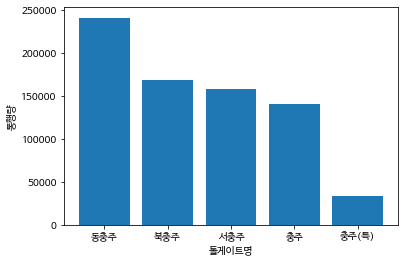

In [31]:
#위의 분석 내용을 bar차트로 그리기 
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.bar(temp_df['gate'],temp_df['VMTC'])
plt.xlabel('톨게이트명')
plt.ylabel('통행량')
plt.show()

([<matplotlib.patches.Wedge at 0x7f533d466490>,
 [Text(0.5752638313549464, 0.9375881421684191, '동충주'),
  Text(-1.018527846286942, 0.41545279676286156, '북충주'),
  Text(-0.5998971545569779, -0.9220213684912305, '서충주'),
  Text(0.6991227149910764, -0.8492510991358837, '충주'),
  Text(1.0888971395124147, -0.15589425762894785, '충주(특)')],
 [Text(0.3137802716481526, 0.5114117139100468, '32.5%'),
  Text(-0.555560643429241, 0.22661061641610628, '22.7%'),
  Text(-0.3272166297583516, -0.502920746449762, '21.3%'),
  Text(0.3813396627224052, -0.46322787225593653, '19.0%'),
  Text(0.5939438942794989, -0.08503323143397155, '4.5%')])

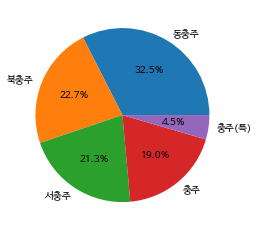

In [32]:
plt.pie(temp_df['VMTC'],labels=temp_df['gate'],autopct='%.1f%%')

In [33]:
#기간내 입 / 축 별 통행량 합계
temp_df2=f_df[['INOUT_SE_CD','VMTC']].groupby(['INOUT_SE_CD'],as_index=False).sum().sort_values(by='INOUT_SE_CD',ascending=True)

In [34]:
temp_df2

,INOUT_SE_CD,VMTC
0,0,338326
1,1,404871


In [39]:
temp_df3=f_df[['hr','VMTC']].groupby(['hr'],as_index=False).sum().sort_values(by='hr',ascending=True)

In [40]:
temp_df3

,hr,VMTC
0,0,6944
1,1,4124
2,2,3937
3,3,4456
4,4,5182
5,5,9016
6,6,23733
7,7,35356
8,8,21585
9,9,35255


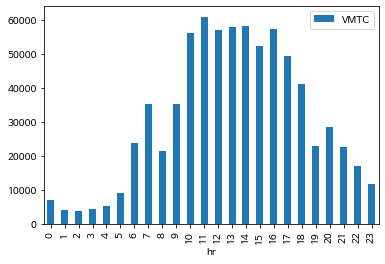

In [41]:
temp_df3.plot.bar(x='hr',y='VMTC')

In [44]:
temp_df4 = f_df.groupby(['gate', 'inout']).aggregate(vmtc = ('VMTC', sum))

In [45]:
temp_df4

vmtc
gate  inout        
동충주   입구     111520
      출구     129889
북충주   입구      76340
      출구      92418
서충주   입구      70441
      출구      87564
충주    입구      63752
      출구      77633
충주(특) 입구      16273
      출구      17367

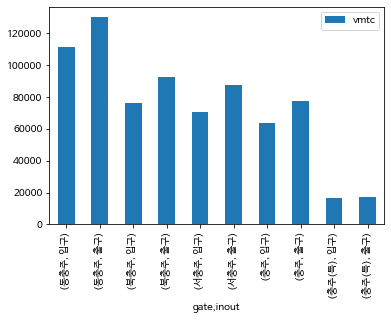

In [46]:
temp_df4.plot.bar()

In [47]:
# 일별, 게이트별, 출입별 통행량 합계 
temp_df5 = f_df.groupby(['date','gate','inout']).aggregate(vmtc=('VMTC',sum))

In [48]:
temp_df5

vmtc
date gate  inout      
1    동충주   입구     5179
           출구     6115
     북충주   입구     3265
           출구     4147
     서충주   입구     3406
...                ...
31   서충주   출구     2760
     충주    입구     2268
           출구     3141
     충주(특) 입구      473
           출구      527

[240 rows x 1 columns]

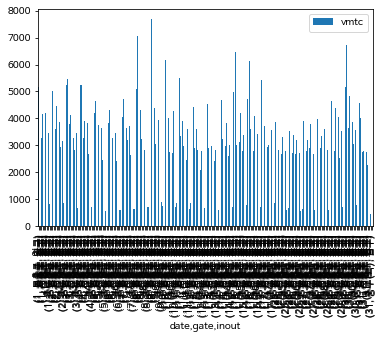

In [49]:
temp_df5.plot.bar()